In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from itertools import combinations
from collections import Counter

## Understanding Dataset

### Abou data

The dataset belongs to Keith Galli. Here you have Sales data for 12 months of an Electronics Store.
Column Names -

Order Id,
Product,
Quantity Ordered,
Price Each,
OrderDate,
Address.

###  Column Descriptions

| Column Name         | Meaning                                                                                     |
|---------------------|----------------------------------------------------------------------------------------------|
| **Order Id**         | A unique identifier for each customer order.  
 Example: `176558`  
 Sometimes multiple items can share the same Order ID if they were purchased together. |
| **Product**          | The name of the product purchased.  
 Example: `iPhone`, `Macbook Pro Laptop`, `Bose Headphones` |
| **Quantity Ordered** | The number of units ordered for that product.  
 It's an integer like `1`, `2`, etc. |
| **Price Each**       | Price per unit of the product (in dollars).  
 Example: `700.00`, `99.99` |
| **OrderDate**        | The date and time when the order was placed.  
 Example: `04/19/19 08:46` |
| **Address**          | Full shipping address of the customer.  
 Example: `917 1st St, Dallas, TX 75001`  
 |


In [3]:
df_jan = pd.read_csv('Sales_January_2019.csv')
df_jan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
df_jan.shape         # There are 9K rows and 6 Columns

(9723, 6)

In [5]:
df_jan.info()  # The datatype of the features are all object, and there are some missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


In [6]:
df_jan.isnull().sum()  

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

## Using describe while data understanding, describe method gives statistical 5 number summary of the features

In [7]:
df_jan.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


# Let's read all our datasets for a year

In [ ]:

months = {
    'January': 'Sales_January_2019.csv',
    'February': 'Sales_February_2019.csv',
    'March': 'Sales_March_2019.csv',
    'April': 'Sales_April_2019.csv',
    'May': 'Sales_May_2019.csv',
    'June': 'Sales_June_2019.csv',
    'July': 'Sales_July_2019.csv',
    'August': 'Sales_August_2019.csv',
    'September': 'Sales_September_2019.csv',
    'October': 'Sales_October_2019.csv',
    'November': 'Sales_November_2019.csv',
    'December': 'Sales_December_2019.csv'
}

datas = []

for from_month, file in months.items():
    data = pd.read_csv(file)
    data['month'] = from_month
    datas.append(data)
    
sales_data = pd.concat(datas, ignore_index= True)
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",December
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",December
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",December
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",December


## Rename Column names

In [9]:
sales_data.rename(columns={
    'Order ID': 'Order_ID',
    'Product': 'Product',
    'Quantity Ordered': 'Quantity_Ordered',
    'Price Each': 'Price_Each',
    'Order Date': 'Order_Date',
    'Purchase Address': 'Purchase_Adress',
    'month': 'Month'
}, inplace= True)
sales_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Adress,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",January
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",January
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",January
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",January
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",January
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",December
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",December
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",December
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",December


# Convert Order_Date column's type to datetime[ns]

In [10]:
sales_data['Order_Date'] = pd.to_datetime(sales_data['Order_Date'], format='%m/%d/%y %H:%M', errors='coerce')
sales_data['Order_Date'] = pd.to_datetime(sales_data['Order_Date'], errors='coerce')

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity_Ordered  186305 non-null  object        
 3   Price_Each        186305 non-null  object        
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Adress   186305 non-null  object        
 6   Month             186850 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 10.0+ MB


In [11]:
sales_data = sales_data.dropna()

## 1.What time should we display advertisements to maximize the likelihood of customers buying products?

In [111]:
sales_data['Order_Time'].mode().reset_index().rename(columns= {0: 'Order_Time'})

,index,Order_Time
0,0,11:58:00


In [12]:
sales_data['Quantity_Ordered'] = sales_data['Quantity_Ordered'].astype('int8')
sales_data['Price_Each'] = sales_data['Price_Each'].astype('float32')

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int8          
 3   Price_Each        185950 non-null  float32       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Adress   185950 non-null  object        
 6   Month             185950 non-null  object        
dtypes: datetime64[ns](1), float32(1), int8(1), object(4)
memory usage: 9.4+ MB


/tmp/ipykernel_107745/3238156082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Quantity_Ordered'] = sales_data['Quantity_Ordered'].astype('int8')
/tmp/ipykernel_107745/3238156082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Price_Each'] = sales_data['Price_Each'].astype('float32')


In [13]:
sales_data.nunique()

Order_ID            178437
Product                 19
Quantity_Ordered         9
Price_Each              17
Order_Date          142395
Purchase_Adress     140787
Month                   12
dtype: int64

In [ ]:
#sales_data['Order_Time'] = sales_data['Order_Date'].dt.time     Created new column for Order Time
#sales_data['Order_Date'] = sales_data['Order_Date'].dt.date          Choose only date part from datetime 
sales_data

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Adress,Month,Order_Time
0,141234,iPhone,1,700.000000,2019-01-22,"944 Walnut St, Boston, MA 02215",January,21:25:00
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28,"185 Maple St, Portland, OR 97035",January,14:15:00
2,141236,Wired Headphones,2,11.990000,2019-01-17,"538 Adams St, San Francisco, CA 94016",January,13:33:00
3,141237,27in FHD Monitor,1,149.990005,2019-01-05,"738 10th St, Los Angeles, CA 90001",January,20:33:00
4,141238,Wired Headphones,1,11.990000,2019-01-25,"387 10th St, Austin, TX 73301",January,11:59:00
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.950000,2019-12-11,"14 Madison St, San Francisco, CA 94016",December,20:58:00
186846,319667,AA Batteries (4-pack),2,3.840000,2019-12-01,"549 Willow St, Los Angeles, CA 90001",December,12:01:00
186847,319668,Vareebadd Phone,1,400.000000,2019-12-09,"273 Wilson St, Seattle, WA 98101",December,06:43:00
186848,319669,Wired Headphones,1,11.990000,2019-12-03,"778 River St, Dallas, TX 75001",December,10:39:00


In [37]:
sales_data.query('Product == "iPhone"')

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Adress,Month,Order_Time
0,141234,iPhone,1,700.0,2019-01-22,"944 Walnut St, Boston, MA 02215",January,21:25:00
104,141336,iPhone,1,700.0,2019-01-09,"811 Hickory St, Portland, OR 97035",January,18:23:00
164,141394,iPhone,1,700.0,2019-01-06,"534 12th St, San Francisco, CA 94016",January,16:54:00
207,141437,iPhone,1,700.0,2019-01-10,"377 Meadow St, New York City, NY 10001",January,15:40:00
228,141457,iPhone,1,700.0,2019-01-09,"820 Jackson St, Seattle, WA 98101",January,22:11:00
...,...,...,...,...,...,...,...,...
186773,319596,iPhone,1,700.0,2019-12-01,"436 14th St, New York City, NY 10001",December,08:44:00
186781,319603,iPhone,1,700.0,2019-12-26,"102 9th St, Boston, MA 02215",December,19:06:00
186807,319629,iPhone,1,700.0,2019-12-18,"941 Willow St, Dallas, TX 75001",December,15:41:00
186813,319634,iPhone,1,700.0,2019-12-11,"817 Center St, Boston, MA 02215",December,16:29:00


## Revenue per Month

In [55]:
months_earns = sales_data.groupby('Month').apply(
    lambda x: (x['Quantity_Ordered'] * x['Price_Each']).sum()).reset_index().rename(columns={0: 'earn'}
    )

months_earns

/tmp/ipykernel_107745/1286759536.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  months_earns = sales_data.groupby('Month').apply(


,Month,earn
0,April,3396059.00
1,August,2244412.25
2,December,4619296.50
3,February,2203481.25
4,January,1815335.00
5,July,2646899.50
6,June,2578293.25
7,March,2809063.00
8,May,3144584.75
9,November,3198909.25


## 2.What was the best month for sales? How much was earned that month?

In [96]:
months_earns[months_earns['earn'] == months_earns['earn'].max()]

,Month,earn
2,December,4619296.5


/tmp/ipykernel_107745/1142065878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=months_earns, x='Month', y='earn', palette='Blues_d')


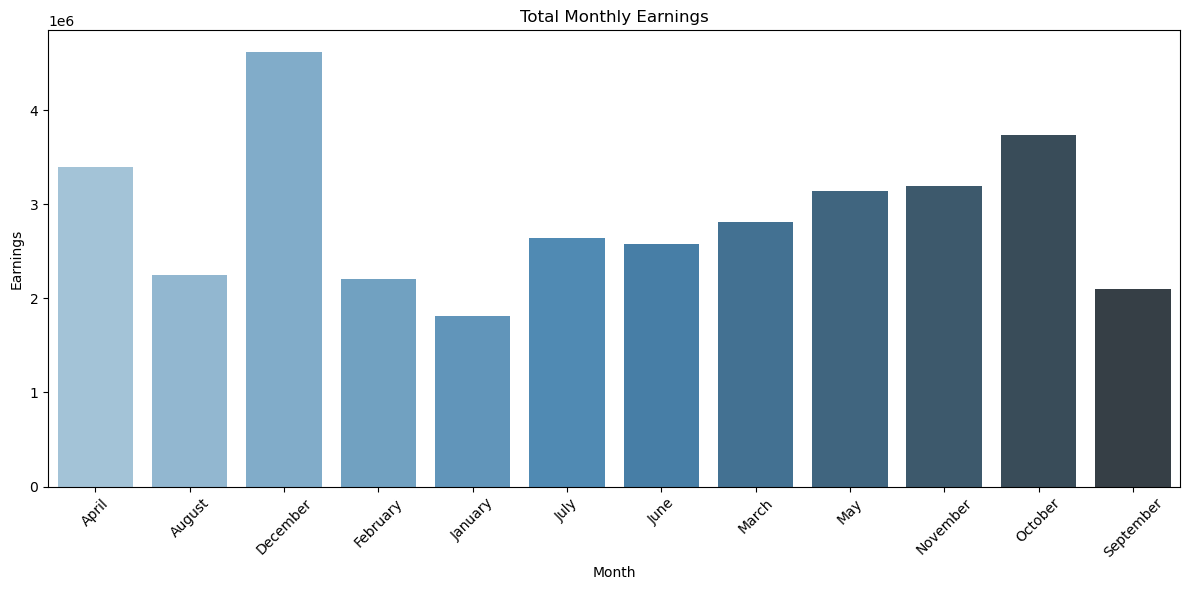

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=months_earns, x='Month', y='earn', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Total Monthly Earnings')
plt.xlabel('Month')
plt.ylabel('Earnings')
plt.tight_layout()
plt.show()


In [56]:
sales_data['Product'].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [62]:
sales_data['City'] = sales_data['Purchase_Adress'].str.split(', ').str[1].str.strip()
sales_data[sales_data['City'].str.contains('Los Angeles')][['Product', 'Order_Date', 'City']]

/tmp/ipykernel_107745/1902559440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['City'] = sales_data['Purchase_Adress'].str.split(', ').str[1].str.strip()


,Product,Order_Date,City
3,27in FHD Monitor,2019-01-05,Los Angeles
6,27in 4K Gaming Monitor,2019-01-26,Los Angeles
8,Bose SoundSport Headphones,2019-01-01,Los Angeles
12,AAA Batteries (4-pack),2019-01-09,Los Angeles
16,Vareebadd Phone,2019-01-10,Los Angeles
...,...,...,...
186819,Apple Airpods Headphones,2019-12-10,Los Angeles
186831,AAA Batteries (4-pack),2019-12-14,Los Angeles
186839,Apple Airpods Headphones,2019-12-16,Los Angeles
186846,AA Batteries (4-pack),2019-12-01,Los Angeles


## 3.What city sold the most product?


In [107]:
sales_data.groupby('City')['Quantity_Ordered'].sum().reset_index().sort_values(by= 'Quantity_Ordered', ascending= False).head(1)

,City,Quantity_Ordered
7,San Francisco,50239


## Top 10 products by quantity sold

In [ ]:
sales_data.groupby('Product')['Quantity_Ordered'].sum().sort_values(ascending= False).head(10).reset_index()

,Product,Quantity_Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


## 4.What products are most often sold together?

In [117]:
#group prod's
order_products = sales_data.groupby('Order_ID')['Product'].apply(list)

pair_counter = Counter()
for products in order_products:
    if len(products) > 1:
        pairs = combinations(sorted(products), 2)
        pair_counter.update(pairs)
        
most_common_pairs = pd.DataFrame(pair_counter.most_common(10), columns=['Product_Pair', 'Count'])
most_common_pairs[most_common_pairs['Count'] == most_common_pairs['Count'].max()]


,Product_Pair,Count
0,"(Lightning Charging Cable, iPhone)",1015


## Revenue per product

In [92]:
revenue = sales_data.groupby('Product').apply(
    lambda x: (x['Quantity_Ordered'] * x['Price_Each']).sum()
).reset_index().rename(columns={0: 'Revenue'}).sort_values(by='Revenue', ascending= False)


/tmp/ipykernel_107745/2473774117.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  revenue = sales_data.groupby('Product').apply(


In [93]:
revenue

,Product,Revenue
13,Macbook Pro Laptop,8.037600e+06
18,iPhone,4.794300e+06
14,ThinkPad Laptop,4.129960e+06
9,Google Phone,3.319200e+06
1,27in 4K Gaming Monitor,2.435098e+06
3,34in Ultrawide Monitor,2.355558e+06
6,Apple Airpods Headphones,2.349150e+06
8,Flatscreen TV,1.445700e+06
7,Bose SoundSport Headphones,1.345565e+06
2,27in FHD Monitor,1.132425e+06


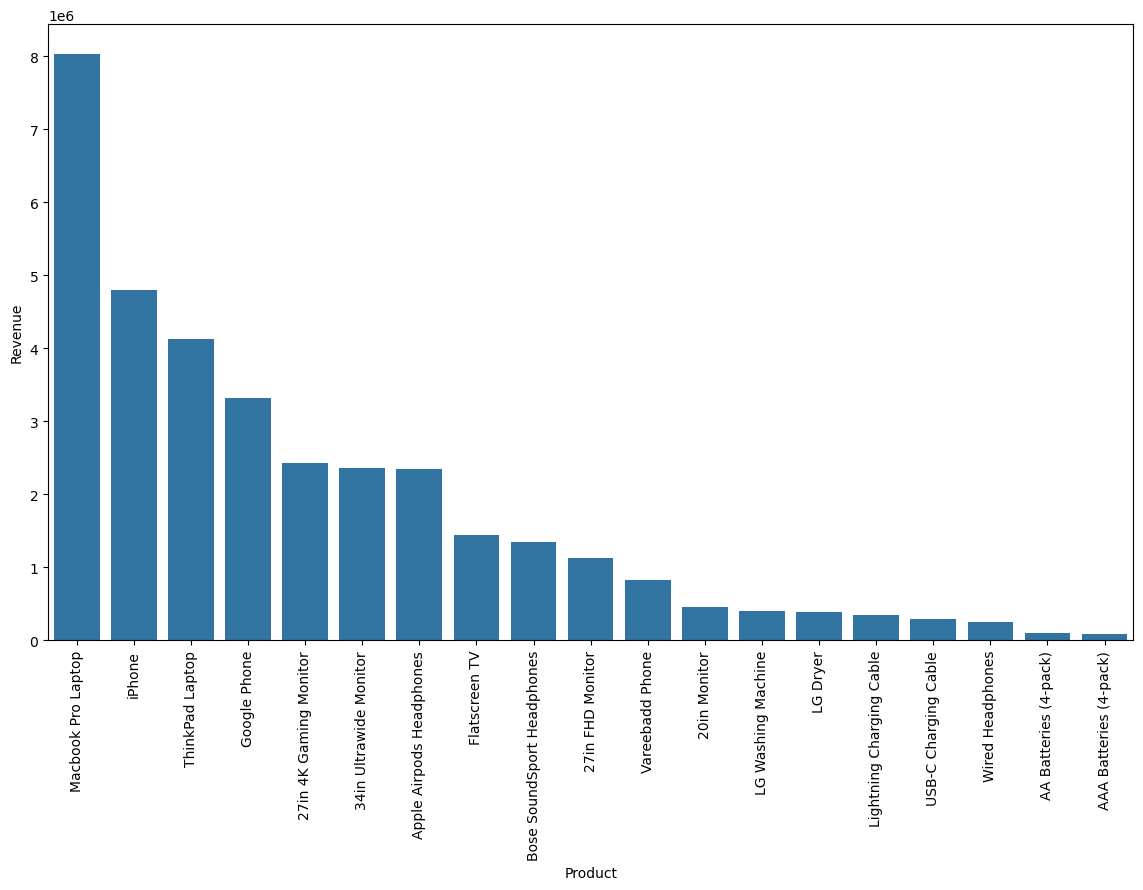

In [95]:
plt.figure(figsize = (14, 8))
sns.barplot(x = revenue['Product'], y=revenue['Revenue'])
plt.xticks(rotation = 90)
plt.show()

## 5.What product sold the most? Why do you think it sold the most?

In [124]:
sales_data.groupby('Product')['Quantity_Ordered'].sum().reset_index().sort_values(by= 'Quantity_Ordered', ascending= False)

,Product,Quantity_Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244
